# UQ MATH2504: Project 3

My soltion to UQ MATH2504 Project 3: Analysis of Datasets and Basic ML Experiments <br><br>
By Joshua Crook S#: 46974408<br>
repo: https://github.com/joshuacrook400/Joshua-Crook-2504-2022-PROJECT3

## Task 1:  Housing Prices Data

In [12]:
using Plots, StatsPlots, StatsBase
include("src/MelbourneHousing.jl");
first(df, 10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date
,String31,String31,Int64,String1,Int64?,String3,String31,String15
1,Abbotsford,68 Studley St,2,h,missing,SS,Jellis,3/09/2016
2,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,3/12/2016
3,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/02/2016
4,Abbotsford,18/659 Victoria St,3,u,missing,VB,Rounds,4/02/2016
5,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/03/2017
6,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,4/03/2017
7,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,4/06/2016
8,Abbotsford,16 Maugie St,4,h,missing,SN,Nelson,6/08/2016
9,Abbotsford,53 Turner St,2,h,missing,S,Biggin,6/08/2016


In [5]:
using Statistics

In [6]:
df[!,:Price] = parse.(Int64, df[:, :Price])

LoadError: ArgumentError: input string is empty or only contains whitespace

### Task 1.1: Exploratory data of single variables

Comparing Price and number of rooms.

In [22]:
summarystats(df_price.Rooms)
df_price = copy(df)
dropmissing!(df_price, :Price);

Summary Stats:
Length:         27247
Missing Count:  0
Mean:           2.992293
Minimum:        1.000000
1st Quartile:   2.000000
Median:         3.000000
3rd Quartile:   4.000000
Maximum:        16.000000


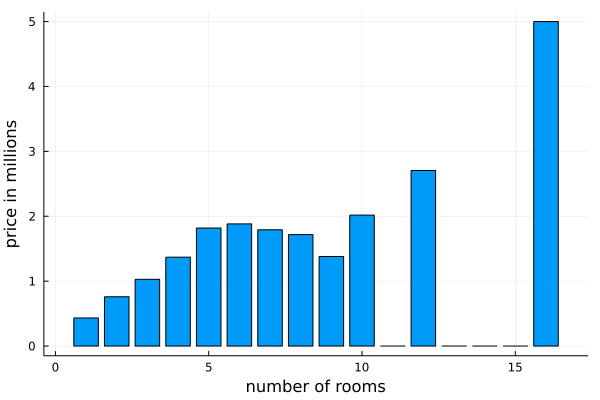

In [41]:
avg_price = [] 
for i in 1:16 
    avg = mean(df_price.Price[df_price.Rooms .== i]) / 1e6
    isnan(avg) ? push!(avg_price, 0) : push!(avg_price, avg) 
end
bar(avg_price, xlabel = "number of rooms", ylabel = "price in millions", legend = false)

### Task 1.2: Exploratory data analysis comparing variables

### Task 1.3: Exploratory data analysis over time 

### Task 1.4: Linear Regression Models